In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style to a valid Seaborn style
plt.style.use('seaborn-v0_8-darkgrid')  # Replace with any valid style from your list

# Load the enhanced dataset
data = pd.read_csv("../outputs/enhanced_XAU_1d_data.csv")

# Display the first few rows
print(data.head())

         Date   Time   Open   High    Low  Close  Volume    MA_50    MA_200  \
0  2005.03.29  00:00  425.5  427.3  425.1  425.3    1028  427.914  418.4670   
1  2005.03.30  00:00  425.2  427.6  424.8  425.3    1789  427.996  418.6730   
2  2005.03.31  00:00  425.3  428.5  425.2  427.8    1479  428.102  418.8980   
3  2005.04.01  00:00  427.7  428.3  424.0  425.1    1624  428.152  419.0805   
4  2005.04.04  00:00  425.1  426.2  421.8  423.3    1620  428.184  419.2780   

   Volatility  Daily_Return        RSI  Cumulative_Return  
0    6.723322     -0.001174  28.189911           1.107264  
1    6.997464      0.000000  27.976190           1.107264  
2    7.125010      0.005878  30.057803           1.113772  
3    7.316053     -0.006311  22.254335           1.106743  
4    7.657626     -0.004234  23.987539           1.102057  


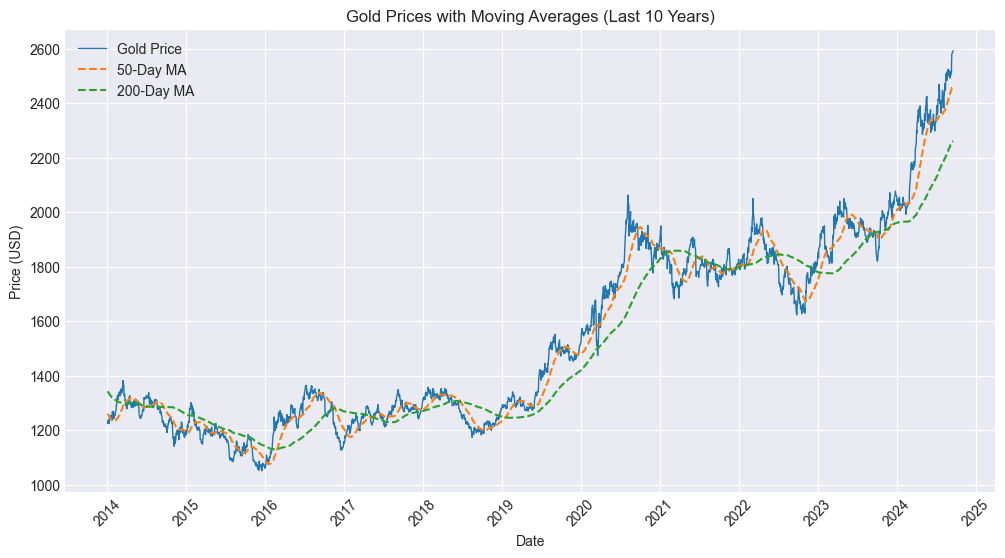

In [12]:
import matplotlib.dates as mdates

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for the last 10 years
recent_data = data[data['Date'] > '2014-01-01']

# Plot gold prices with moving averages
plt.figure(figsize=(12, 6))
plt.plot(recent_data['Date'], recent_data['Close'], label="Gold Price", linewidth=1)
plt.plot(recent_data['Date'], recent_data['MA_50'], label="50-Day MA", linestyle="--")
plt.plot(recent_data['Date'], recent_data['MA_200'], label="200-Day MA", linestyle="--")

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Yearly ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.title("Gold Prices with Moving Averages (Last 10 Years)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

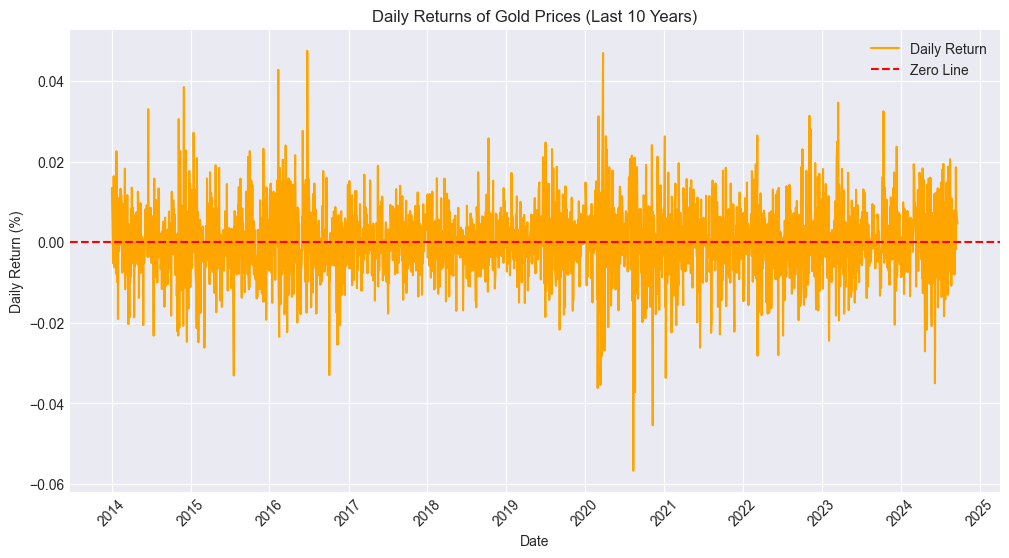

In [13]:
# Plot daily returns
# Filter data for the last 10 years
recent_data = data[data['Date'] > '2014-01-01']

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(recent_data['Date'], recent_data['Daily_Return'], label="Daily Return", color="orange")
plt.axhline(0, color='red', linestyle='--', label="Zero Line")

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.title("Daily Returns of Gold Prices (Last 10 Years)")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.show()

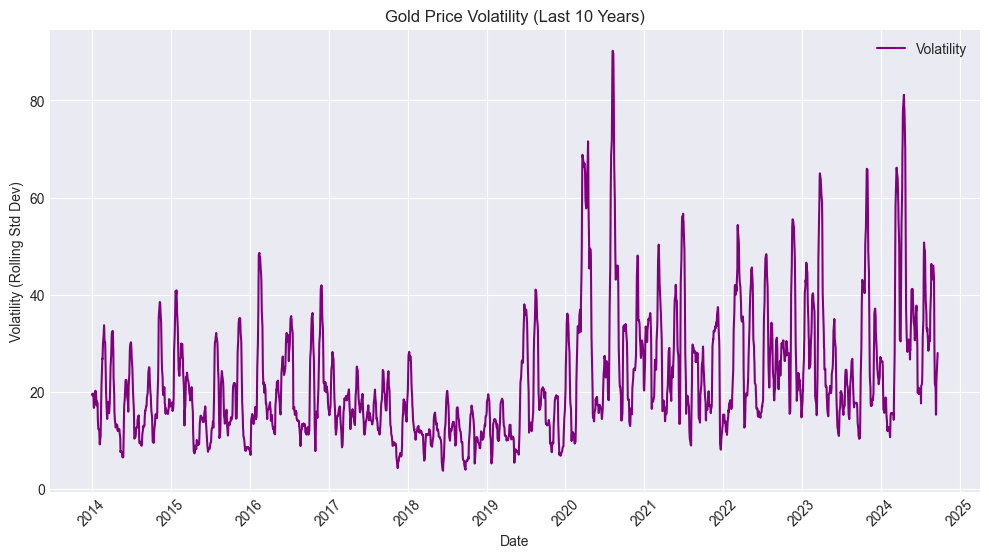

In [14]:
# Plot volatility
# Filter data for the last 10 years
recent_data = data[data['Date'] > '2014-01-01']

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(recent_data['Date'], recent_data['Volatility'], label="Volatility", color="purple")

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.title("Gold Price Volatility (Last 10 Years)")
plt.xlabel("Date")
plt.ylabel("Volatility (Rolling Std Dev)")
plt.legend()
plt.show()

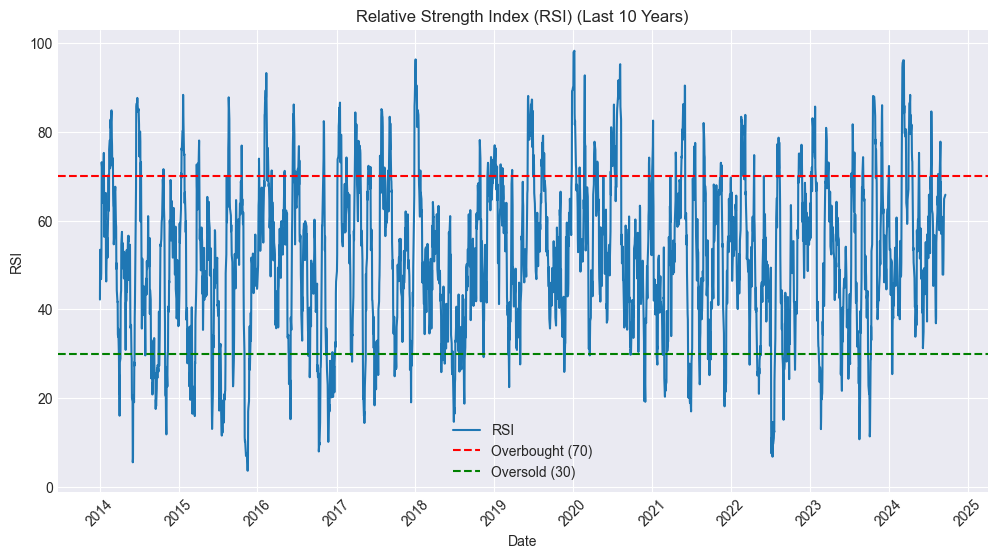

In [15]:
# Plot RSI
# Filter data for the last 10 years
recent_data = data[data['Date'] > '2014-01-01']

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(recent_data['Date'], recent_data['RSI'], label="RSI")
plt.axhline(70, color='red', linestyle='--', label="Overbought (70)")
plt.axhline(30, color='green', linestyle='--', label="Oversold (30)")

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.title("Relative Strength Index (RSI) (Last 10 Years)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

# Select relevant columns for correlation analysis
correlation_data = data[['Close', 'Daily_Return', 'Volatility', 'RSI', 'Cumulative_Return']]
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()